## Working on a baseline Model

In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.regularizers import l2

## Preparing Baseline Model

In [36]:
Baseline_model = Sequential()
Baseline_model.add(Conv2D(32,(3,3),input_shape = (3,224,224),kernel_regularizer = l2(0.001)))
Baseline_model.add(Activation('relu'))
Baseline_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

Baseline_model.add(Conv2D(32,(3,3),padding = 'same'))
Baseline_model.add(Activation('relu'))
Baseline_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

Baseline_model.add(Conv2D(32,(3,3),padding = 'same', kernel_regularizer = l2(0.001)))
Baseline_model.add(Activation('relu'))
Baseline_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

#current ouput are 3-d feature maps(height, width,features)

Baseline_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
Baseline_model.add(Dense(64, kernel_regularizer=l2(0.01)))
Baseline_model.add(Activation('relu'))
Baseline_model.add(Dropout(0.5))
Baseline_model.add(Dense(1, kernel_regularizer=l2(0.01)))
Baseline_model.add(Activation('tanh'))

Baseline_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
Baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 1, 222, 32)        64544     
                                                                 
 activation_5 (Activation)   (None, 1, 222, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 111, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 111, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 1, 111, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 56, 32)        0         
 2D)                                                  

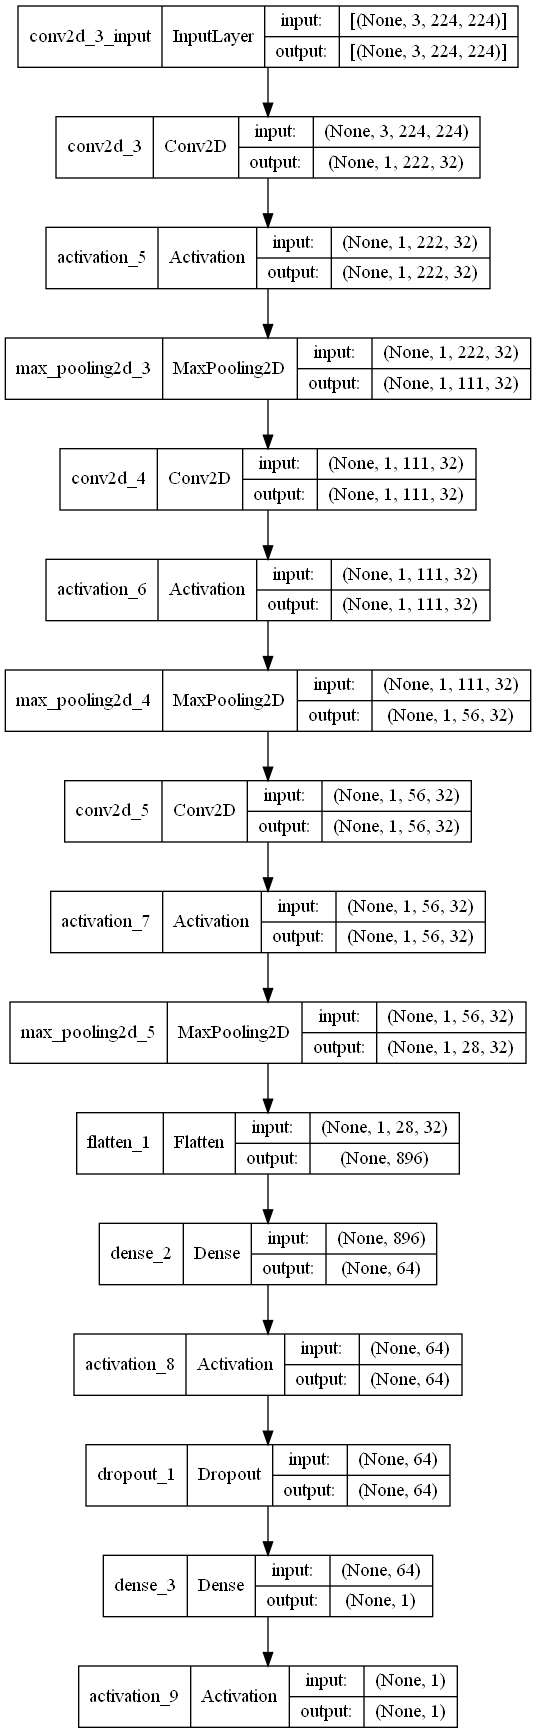

In [38]:
from keras.utils.vis_utils import plot_model
plot_model(Baseline_model, to_file='baseline_model_plot.png', show_shapes=True, show_layer_names=True)

In [39]:
img_array = cv2.imread("Train_Dataset/Closed_Eyes/s0001_00391_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)

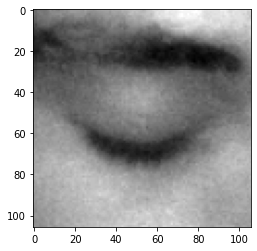

In [40]:
plt.imshow(img_array,cmap = "gray")

In [41]:
img_array.shape

(106, 106)

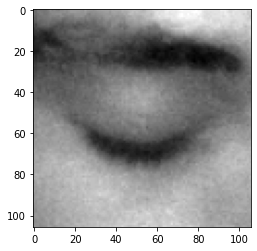

In [42]:
Datadirectory= "Train_Dataset/" ## training dataset 
Classes = ["Closed_Eyes","Open_Eyes"] ## List of classes 
for category in Classes: 
    path = os.path.join(Datadirectory, category) ## // 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB) 
        plt.imshow(img_array, cmap="gray") 
        plt.show()
        break
    break

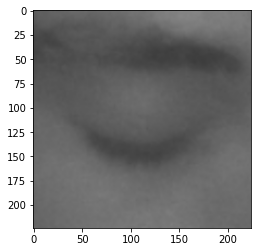

In [43]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size, img_size)) 
plt.imshow(new_array, cmap="gray")
plt.show()

In [44]:
training_Data= []

def create_training_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category) 
        class_num = Classes.index(category) ## 1, 
        for img in os.listdir(path): 
            try:
                img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [45]:
create_training_Data()

In [46]:
print(len(training_Data))

7000


In [47]:
import random

random.shuffle(training_Data)

In [48]:
X = [] 
y = []

for features, label in training_Data: 
    X.append(features) 
    y.append (label)

X= np.array(X).reshape(-1, 3, img_size, img_size).astype('int')

In [49]:
X.shape

(7000, 3, 224, 224)

In [51]:
X=X/255;

In [52]:
Y=np.array(y)

In [53]:
history = Baseline_model.fit(X,Y,epochs = 10, validation_split = 0.25)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
164/165 [============================>.] - ETA: 0s - loss: 1.2880 - accuracy: 0.7262WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000176BCB7E8C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

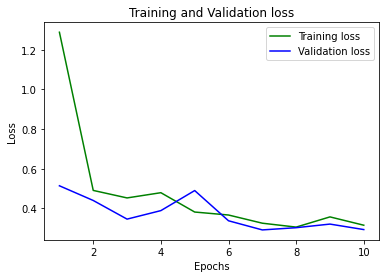

In [54]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

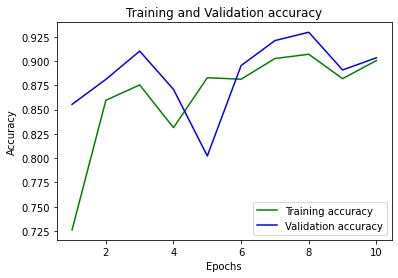

In [55]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

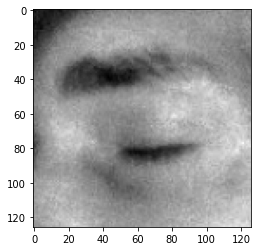

In [56]:
Datadirectory= "test_data/" ## training dataset 
Classes = ["close_Eyes","open_eyes"] ## List of classes 
for category in Classes: 
    path = os.path.join(Datadirectory, category) ## // 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB) 
        plt.imshow(img_array, cmap="gray") 
        plt.show()
        break
    break
    
testing_Data= []

def create_testing_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category) 
        class_num = Classes.index(category) ## 1, 
        for img in os.listdir(path): 
            try:
                img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                testing_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [57]:
create_testing_Data()

In [58]:
print(len(testing_Data))

364


In [59]:
import random

random.shuffle(testing_Data)

In [60]:
X_test = [] 
y_test = []

for features, label in testing_Data: 
    X_test.append(features) 
    y_test.append (label)

X_test= np.array(X_test).reshape(-1, 3, img_size, img_size).astype('int')

In [61]:
X_test.shape

(364, 3, 224, 224)

In [62]:
X_test = X_test/255.0;


In [63]:
prediction = Baseline_model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [64]:
prediction

array([[ 9.62094724e-01],
       [ 1.19724989e-01],
       [ 1.95507780e-01],
       [ 1.09784104e-01],
       [ 8.54428649e-01],
       [ 2.95191914e-01],
       [ 5.54032736e-02],
       [ 9.61634278e-01],
       [ 6.46373570e-01],
       [ 5.95569611e-02],
       [ 8.20531249e-02],
       [ 3.42867039e-02],
       [ 1.35511279e-01],
       [ 9.21763599e-01],
       [ 4.92731482e-01],
       [ 3.40584666e-01],
       [ 1.37874847e-02],
       [ 8.16013431e-04],
       [ 8.86667371e-01],
       [ 2.51244932e-01],
       [ 5.89437261e-02],
       [ 8.97723734e-01],
       [ 4.86937650e-02],
       [ 4.56990987e-01],
       [ 1.19573779e-01],
       [ 9.03186381e-01],
       [ 5.69737591e-02],
       [ 8.29550698e-02],
       [ 6.34048104e-01],
       [ 9.54537272e-01],
       [ 9.61768687e-01],
       [ 9.66174364e-01],
       [ 1.93308204e-01],
       [ 2.18133241e-01],
       [ 2.37718761e-01],
       [ 3.38388801e-01],
       [ 9.98020172e-01],
       [ 9.76473749e-01],
       [ 3.5

In [65]:
Y_test = np.array(y_test)
Y_test.shape

(364,)

In [66]:
Y_test

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [67]:
predict = np.arange(len(Y_test))

In [68]:
i = -1;
for value in prediction:
    i+=1
    if value>0:
        predict[i] = 1;
    else:
        predict[i] = 0;

In [69]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
score = (((predict-Y_test) == 0).sum())/len(Y_test)

In [71]:
score

0.5027472527472527

In [72]:
model = tf.keras.models.load_model('my_model.h5')

In [73]:
import random

random.shuffle(testing_Data)

X_test = [] 
y_test = []

for features, label in testing_Data: 
    X_test.append(features) 
    y_test.append (label)

X_test= np.array(X_test).reshape(-1, img_size, img_size, 3).astype('int')

In [74]:
X_test.shape

(364, 224, 224, 3)

In [75]:
X_test = X_test/255.0;
Y_test = np.array(y_test)

In [76]:
prediction_1 = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [77]:
predict_1 = np.arange(len(Y_test))

In [78]:
i = -1;
for value in prediction_1:
    i+=1
    if value>0:
        predict_1[i] = 1;
    else:
        predict_1[i] = 0;

In [79]:
predict_1

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [80]:
score_1 = (((predict_1-Y_test) == 0).sum())/len(Y_test)
print(score_1)

0.9505494505494505
